In [1]:
import math

损失函数: 衡量模型预测的好坏

下面举5个例子  \
1）MSE(Mean Squared Error) \
2）Cross Entropy Error \
3）RMSE(Root Mean Squared Error) \
4）MAE(Mean Absolute Error)   \
5）MAPE(Mean Absolute Percentage Error) 

为什么使用损失函数

## 1. MSE(Mean Squared Error)

In [2]:
from IPython.display import Image 
import numpy as np

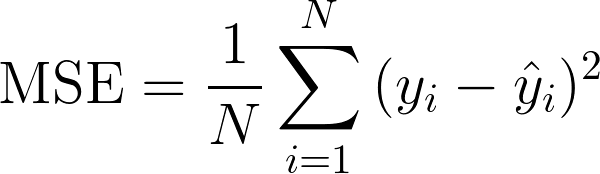

In [3]:
Image("公式/mse.png")

yi为真实值， 预测值为yi^

优点：简单易懂， 直观   \
缺点：根据数据的规模不同时，分不清哪个模型更好  \
    例1： 阿里的股价为10000， 腾讯的股价为7000， 两者的 mse都是5000   \ 
          两者模型的误差率不一致，但是mse值是一样的   \
    例2： 由于是**2 所以比一小的数据的值会变的更小  \

In [4]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [5]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t)))

0.09750000000000003


## 2. Cross Entropy Error

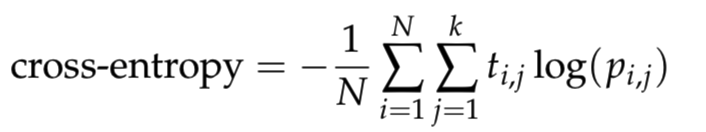

In [6]:
Image("公式/cross_entropy_error.png")

N: 数据大小  \
i: 第i个数据 \
j: 第j次元 \
yij: 神经元的输出 \
tij: 正确答案  

In [7]:
def cross_entropy_error(y,t):       # 只有一个元素的时候
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

In [8]:
def cross_entropy_error(y,t):           # 有N个元素的时候
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]))/batch_size

## 3. RMSE(Root Mean Squared Error)

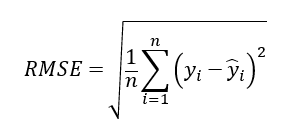

In [9]:
Image("公式/rmse.png")

yi为真实值， 预测值为yi^

优缺点和MSE不尽相同  \
但是比MSE好一点的是由于有根号，所以变相的解决了数字过大或过小的问题

In [10]:
def root_mean_squared_error(y,t):             # sqrt(mse)
    return math.sqrt(0.5*np.sum((y-t)**2))

In [11]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(root_mean_squared_error(np.array(y),np.array(t)))

0.31224989991991997


## 4.MAE(Mean Absolute Error)

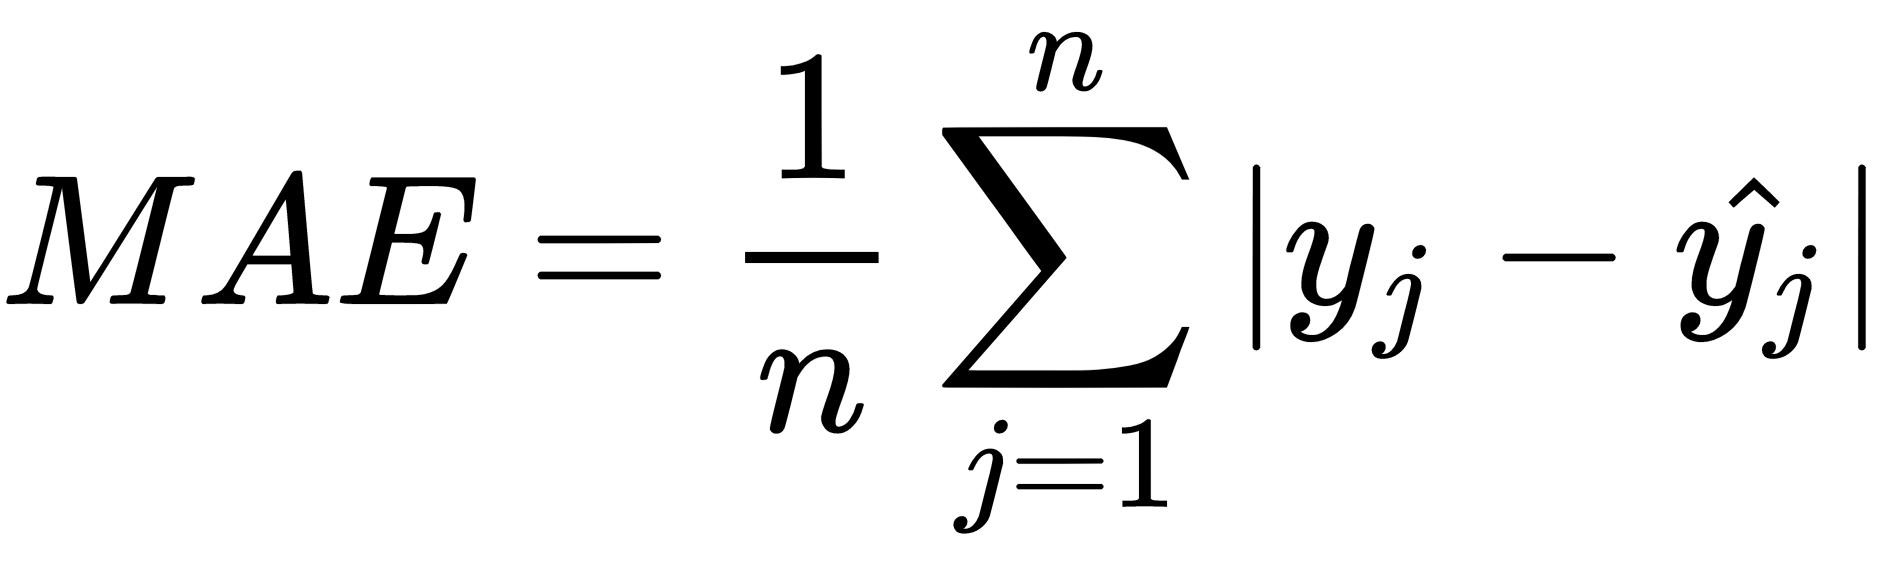

In [12]:
Image("公式/mae.png")

绝对值的平均值

优点： 直观  \
缺点： 和MSE的缺点是一样的

In [13]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, -0.3, 2, 8]

In [14]:
def mean_absolute_error(y_pred,y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) * 100

In [15]:
print(mean_absolute_error(y_pred,y_true))

42.5


## 5. MAPE(Mean Absolute Percentage Error) 

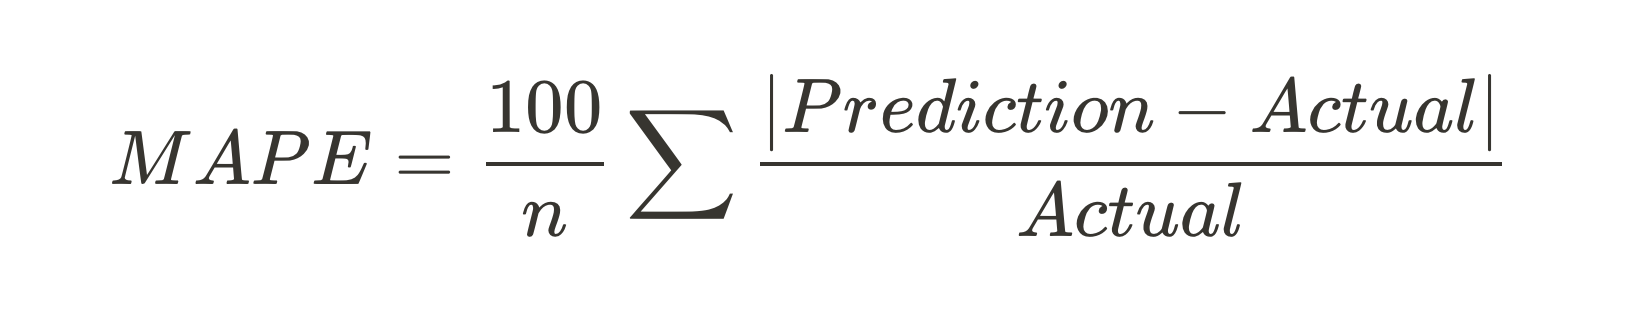

In [16]:
Image("公式/mape.png")

一般用于模型的准确率 -> 准确率 = 100 -  MAPE

MAPE 来源于MAE  \
MAE是 （预测值-平均值）的绝对值的平均   \
MAPE是 (预测值-平均值)/预测值的绝对值的平均   

In [17]:
def mean_absolute_percentage_error(y_pred,y_true): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
print(mean_absolute_percentage_error(y_pred,y_true))

17.738095238095237


In [19]:
print("准确率： ",100-mean_absolute_percentage_error(y_pred,y_true))

准确率：  82.26190476190476
